In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from collections import Counter
sns.set() 

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

## Исследование датасета

**Исследуем выборку train**

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
train.shape

(8693, 14)

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

В каждом столбце присутствуют пустые значения

In [9]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


**Исследуем выборку test**

In [10]:
test.shape

(4277, 13)

In [11]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [12]:
test.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [14]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

В каждом столбце присутствуют пустые значения

## Зависимости признаков и того, был ли пассажир перемещён

**Homeplanet and transported**

In [15]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [16]:
train.groupby('HomePlanet').Transported.value_counts() # Сколько было перемещено для каждой планеты

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: count, dtype: int64

In [17]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index=False).mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


<Axes: xlabel='HomePlanet', ylabel='Transported'>

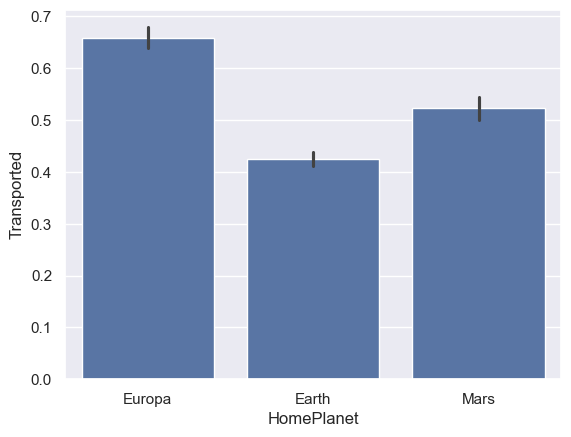

In [18]:
sns.barplot(x='HomePlanet', y='Transported', data=train)

**CryoSleep and transported**

In [19]:
train.CryoSleep.value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [20]:
train.groupby('CryoSleep').Transported.value_counts()

CryoSleep  Transported
False      False          3650
           True           1789
True       True           2483
           False           554
Name: count, dtype: int64

In [21]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep', as_index=False).mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


<Axes: xlabel='CryoSleep', ylabel='Transported'>

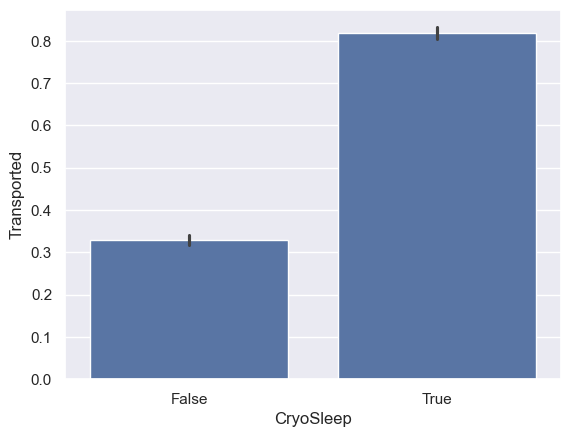

In [22]:
sns.barplot(x='CryoSleep', y='Transported', data=train)


**Age and transported**

Разобъём возраст на 8 возрастных групп и проанализируем зависимость.

In [23]:
(train['Age'].min(), train['Age'].max())

(0.0, 79.0)

In [24]:
train['Age_group'] = pd.cut(train['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)

In [25]:
train[['Age_group', 'Transported']].groupby('Age_group', as_index=False).mean()

,Age_group,Transported
0,0.0,0.707521
1,1.0,0.517764
2,2.0,0.469265
3,3.0,0.468452
4,4.0,0.497988
5,5.0,0.489362
6,6.0,0.491803
7,7.0,0.378378


<Axes: xlabel='Age_group', ylabel='Transported'>

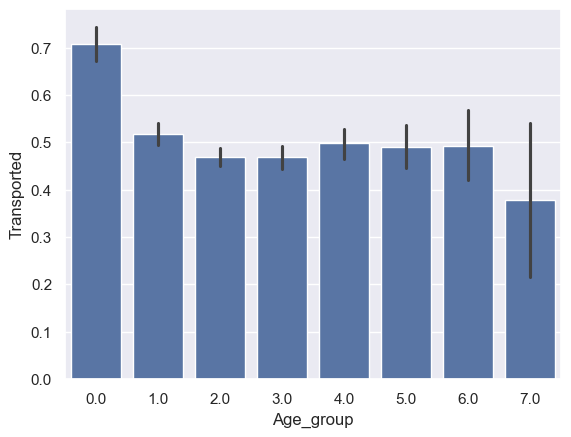

In [26]:
sns.barplot(x='Age_group', y='Transported', data=train)

**Destination and Transported**

In [27]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Transported'>

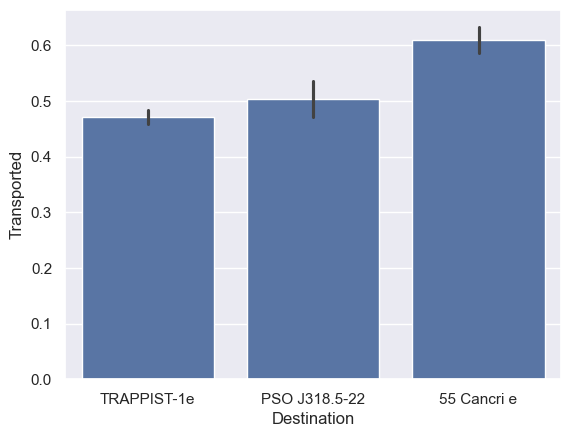

In [28]:
sns.barplot(x='Destination', y='Transported', data=train)

**Age, sleep and Transported**

Т.к. нахождение в криптосне сильно влияет на вероятность перемещения, проанализируем влияние принадлежности к возрастным группам и нахождения в криптосне одновременно.

In [29]:
total_transported = train[train['Transported']==1]
total_not_transported = train[train['Transported']==0]
sleep_transported = train[(train['Transported']==1) & (train['CryoSleep']==1)]
not_sleep_transported = train[(train['Transported']==1) & (train['CryoSleep']==0)]
sleep_not_transported = train[(train['Transported']==0) & (train['CryoSleep']==1)]
not_sleep_not_transported = train[(train['Transported']==0) & (train['CryoSleep']==0)]

C:\Users\Remix\AppData\Local\Temp\ipykernel_28320\2464555525.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='blue', ax = ax1)
C:\Users\Remix\AppData\Local\Temp\ipykernel_28320\2464555525.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

<Axes: xlabel='Not sleep'>

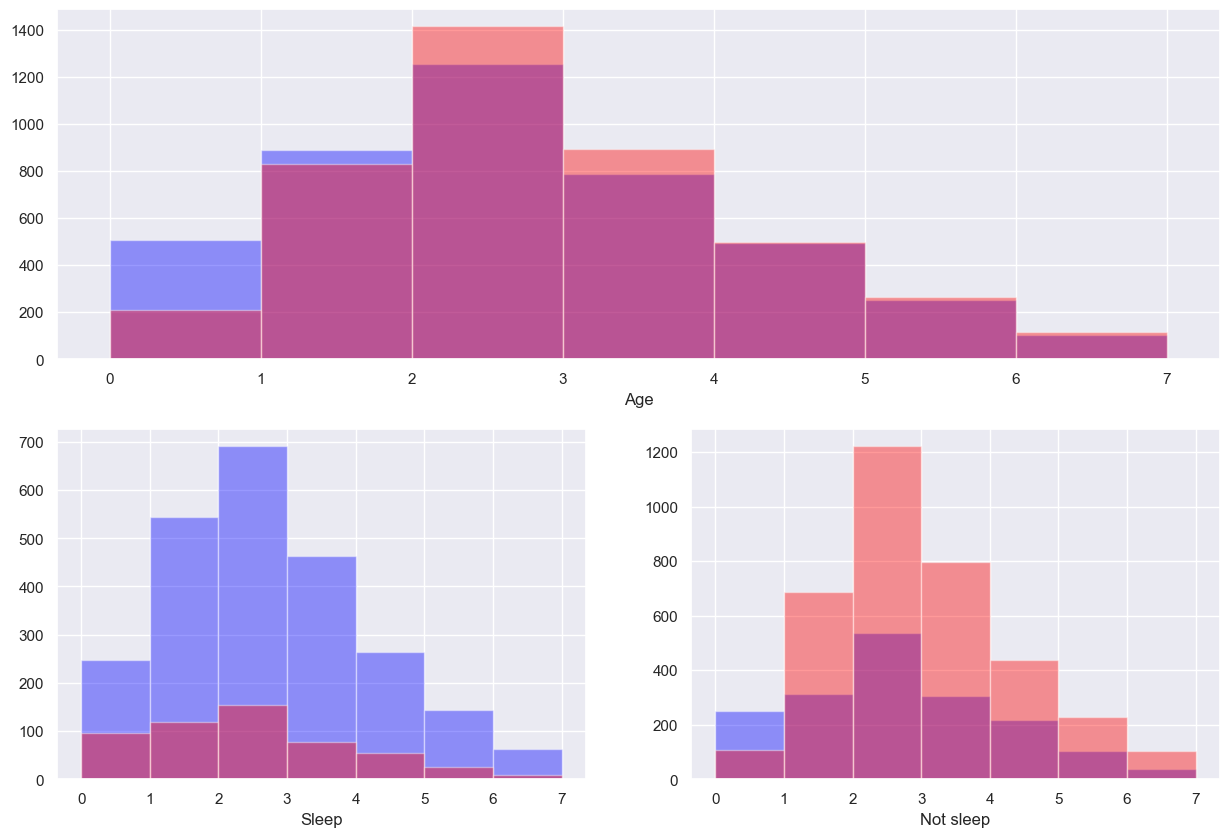

In [30]:
fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.distplot(total_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='blue', ax = ax1)
sns.distplot(total_not_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='red', axlabel='Age', ax = ax1)

ax2 = fig.add_subplot(223)
sns.distplot(sleep_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='blue', ax = ax2)
sns.distplot(sleep_not_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='red', axlabel='Sleep', ax = ax2)

ax3 = fig.add_subplot(224)
sns.distplot(not_sleep_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='blue', ax=ax3)
sns.distplot(not_sleep_not_transported['Age_group'].dropna().values, bins=range(0, 8, 1), kde=False, color='red', axlabel='Not sleep', ax=ax3)

Отсюда можно увидеть, что большая часть перемещённых пассажиров для возрастов от 10 до 40 лет не находились в криптосне. В то же время видно, что в возрастной группе до 10 лет нахождение в криптосне не дало таких эффектов.